# Circuit Library 
https://qiskit.org/documentation/apidoc/circuit_library.html#module-qiskit.circuit.library



# The circuit library 
   - Collection of valuable circuit families
    * Building blocks for algorithms
    * difficult to simulate classically
    * Useful for education
   - Library contains tests, documentation and is easily extensible
   - Qiskit Aqua works natively with this suite of circuits
   

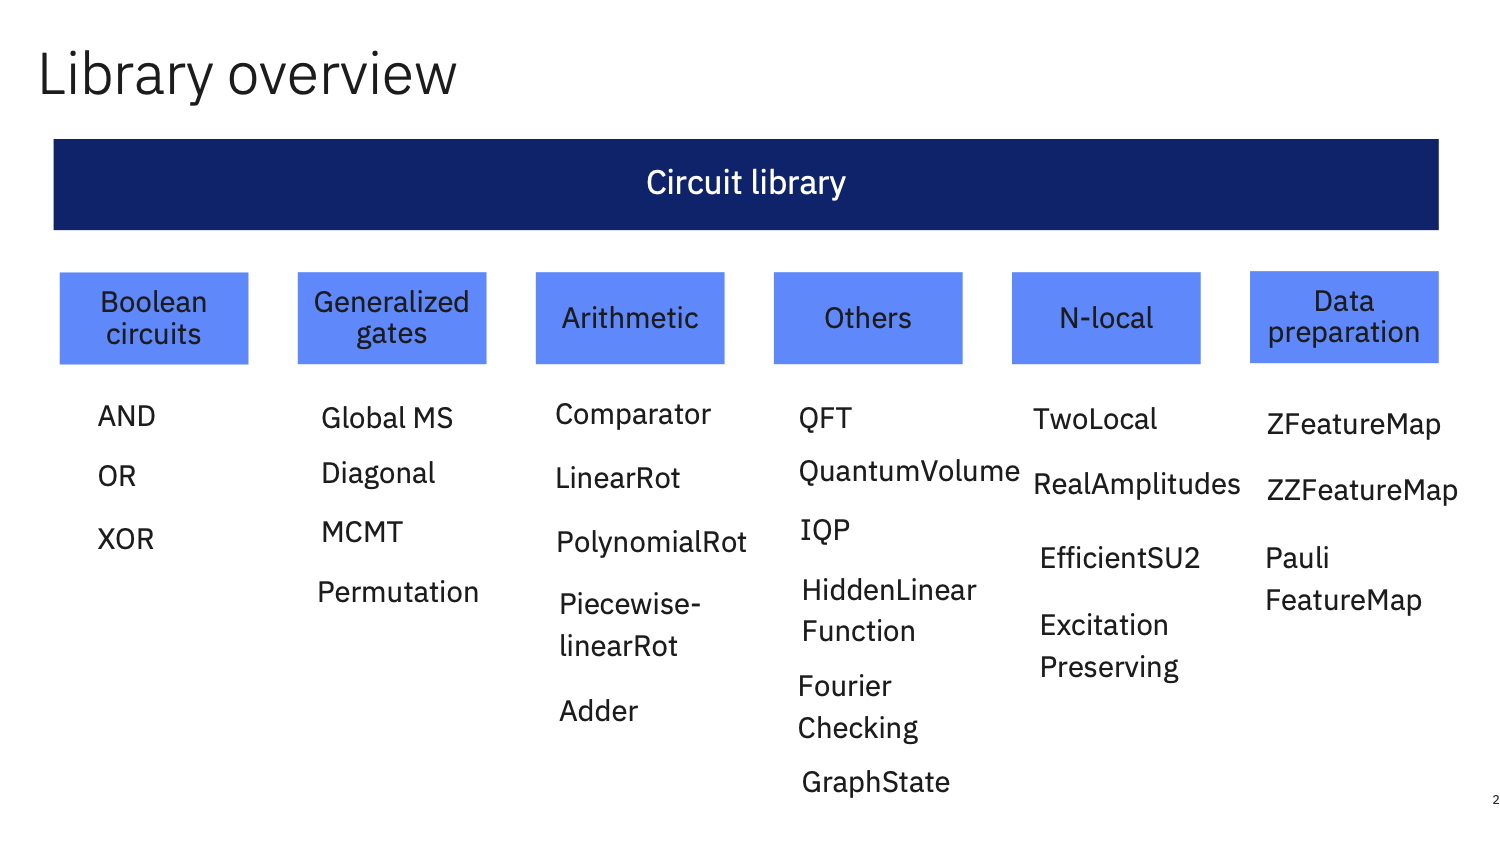

# Examples of Circuit Library usage

### *Using standard Gates* 

In [ ]:
import qiskit.tools.jupyter
import qiskit

In [ ]:
# The single-qubit Pauli-Z gate 
# Equivalent to a 'pi' radian rotation about the Z axis.
from qiskit.circuit.library import CZGate

# we create a gate that we name 'mycz' with a label 'cz'
label='cz'
mycz = CZGate(label=label)

print("This is my gate definition: \n")
mycz.definition.draw(output='mpl')


In [ ]:
# We create a circuit and append those 2 gates
from qiskit import QuantumCircuit
circ = QuantumCircuit(2)
circ.append(mycz, [0,1])
circ.draw(output='mpl')

In [ ]:
#.decompose() does not modify original circuit
circ.decompose().draw(output='mpl')

In [ ]:
### We create a gate that is a repeat of the mycz 12 times    
mygates = mycz.repeat(12)
circuit = QuantumCircuit(2)
circuit.append(mygates, [0,1])
circuit.draw(output='mpl')


In [ ]:
circuit.decompose().draw(output='mpl')

In [ ]:
circuit.decompose().decompose().draw(output='mpl')

In [ ]:
# standard gates 
# from numpy import Matrix
from qiskit.circuit.library import CCXGate, HGate
_h = HGate(label='H')
_ccx = CCXGate(label='ccx')

print(_ccx.to_matrix())
_ccx.definition.draw(output='mpl')


In [ ]:
print(_h.to_matrix())
_h.definition.draw(output='mpl')


# Examples of Circuit Library usage

### *Using Boolean Logic Circuit*

In [ ]:
# A circuit implementing the logical AND operation on a number of qubits (2)
from qiskit.circuit.library import AND
circuit_and = AND(2)
%circuit_library_info circuit_and

In [ ]:
# A circuit implementing the logical XOR operation on a number of qubits (2)
from qiskit.circuit.library import XOR
circuit_xor = XOR(3, 3) # 3 is the XOR amount 
%circuit_library_info circuit_xor

# *You can compose your circuit with those objects* 

In [ ]:
# compose circuit_or and circuit_and
my_circuit = circuit_xor.compose(circuit_and)
my_circuit.draw(output = 'mpl')


In [ ]:
# Add circuit_xor to the circuit
my_circuit.compose(circuit_xor).draw(output='mpl')

# *Now it's your turn to play!*  - *First Challenge*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's the first challenge for you: In the following cells, create a circuit implementing the logical OR operation on 3 qubits. List the circuit properties, width, depth and number of gates then decompose the circuit to only get basis gates U1, U2, U3 and CNOT  
</div>

In [ ]:
# Import the OR gate from circuit library 


# create the OR circuit on 3 qubits 


In [ ]:
# List the circuit properties, width, depth and number of gates 

In [ ]:
# Decompose the circuit to get only basis gates U1, U2, U3 and CNOT
# list the circuit properties and the number of basis gates. 


# Examples of Circuit Library usage
### *Using Generalized gates*

In [ ]:
# example of a multi-controlled NOT gate
from qiskit.circuit.library import MCMT
circuit=MCMT('x', 2, 1)
circuit.draw(output='mpl')

In [ ]:
# Or using the standard ccx gate or the toffoli 
from qiskit import QuantumCircuit, QuantumRegister
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)

# qc.ccx(q[0],q[1], q[2])

qc.toffoli(qr[0],qr[1], qr[2])

qc.draw(output='mpl')

# Examples of Circuit Library usage

### *Using Pauli Rotations and Real Amplitudes*

In [ ]:
from qiskit.circuit.library import LinearPauliRotations, RealAmplitudes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)

# Create a new linear rotation circuit
pauli_rotations = LinearPauliRotations(3, offset=1, slope=2)

# The `RealAmplitudes` circuit is a heuristic trial wave function used as Ansatz in
# chemistry applications or classification circuits in machine learning. 
# The circuit consists of alternating layers of `Y` rotations and `CX` entanglements.
wavefunction = RealAmplitudes(3, reps=1)

# draw of the circuits 
pauli_rotations.draw(output='mpl', ax=ax[0])
wavefunction.draw(output='mpl',scale=1.6,  ax=ax[1])

# Examples of Circuit Library usage
### *Basis Change Circuits*


In [ ]:
# Quantum Fourier Transform 
from qiskit.circuit.library import QFT
qft = QFT(3, insert_barriers=True)


In [ ]:
print('Operations:', qft.count_ops())
print('Depth:', qft.depth(), 'width:', qft.width())


### *These objects are circuits!*

In [ ]:
qft.x(0)
qft.cswap(0, 1, 2)
qft.draw(output='mpl')

In [ ]:
my_circuit = QFT(2).compose(RealAmplitudes(2)).compose(OR(1))
my_circuit.draw(output='mpl')

# Algorithm Workflow 

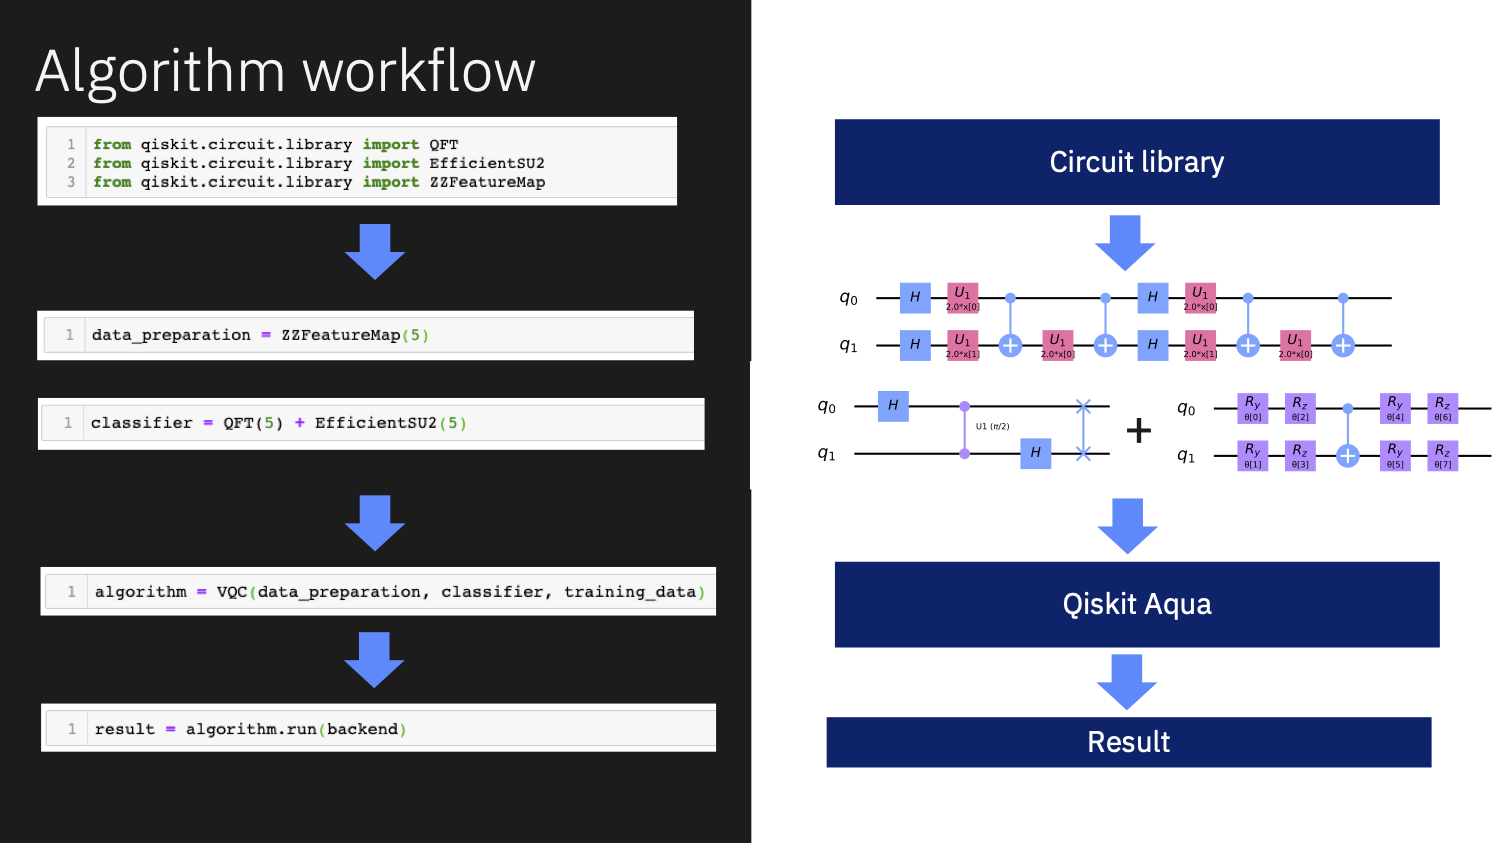

### *what moved to the Circuit Library*

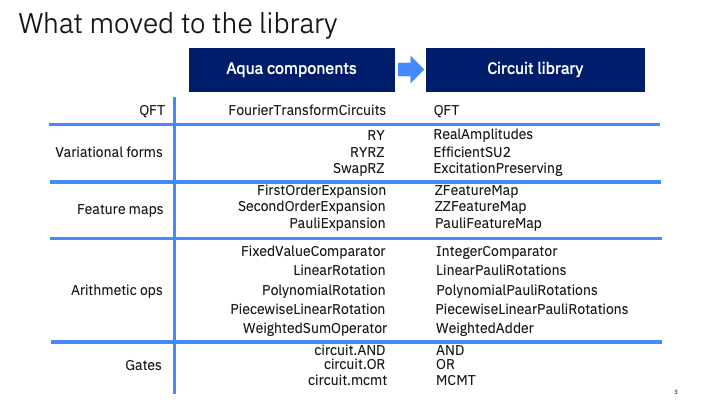

## *Now it's your turn to play!* - *Second challenge*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a challenge for you: Implement the circuit below using the Circuit Library gates. 
    
  - Note: the "Control R" gates are "Control Phase shift" gates
</div>

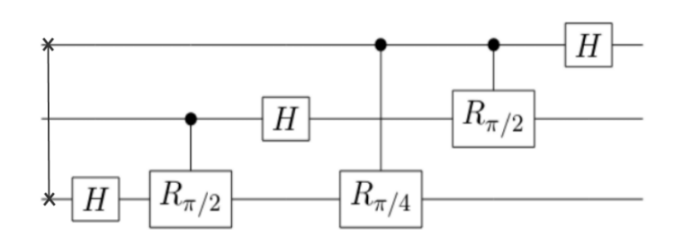

# Challenges Solutions
<div class="alert alert-success">
<b>First Challenge solution</b>


In [ ]:
# Import the OR gate from circuit library 
from qiskit.circuit.library import OR

# create the OR circuit on 3 qubits 
circuit_or = OR(3)

In [ ]:
# List the circuit properties, width, depth and number of gates 
%circuit_library_info circuit_or

In [ ]:
# Decompose the circuit to get only basis gates U1, U2, U3 and CNOT
# list the circuit properties and the number of basis gates. 
%circuit_library_info circuit_or.decompose().decompose().decompose()

<div class="alert alert-success">
<b>Second challenge solution</b>

In [ ]:
# The circuit represents a Quantum Fourier Transform. 
# Pretty easy to implement using Circuit Library from Qiskit 
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

qft = QFT(3, insert_barriers=False)

qft.draw(output='mpl')

In [ ]:
# let's get the inverse 
qft_inverse = qft.inverse()
qft_inverse.draw(output='mpl')